# Pair Coding: Vanishing Lines
**ES143 Computer Vision, Harvard University, Fall 2020**

Calculate and plot the vanishing line of the ground plane (i.e., the horizon line) superimposed on the image <tt>xiongheight.jpg</tt>. To calculate the vanishing line, use the pixel coordinates in <tt>xiongheight.pickle</tt>.

When you have a drawing, post it to [padlet](https://padlet.com/zickler/vanishinglines) with your names in the title of your post. 

In [16]:
# Import required libraries here
import cv2           # OpenCV
import numpy as np   # numpy
import os            # for file handling
import pickle        # for importing and exporting data files

# Use this line to make matplotlib plot inline (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt
# Modify this line to adjust the displayed plot size. You can also call
# it with different parameters before specific plots.
plt.rcParams['figure.figsize'] = [10, 15]

[3.45137290e+01 2.27012763e+03 1.00000000e+00]
[1.35746010e+04 2.37190228e+03 1.00000000e+00]


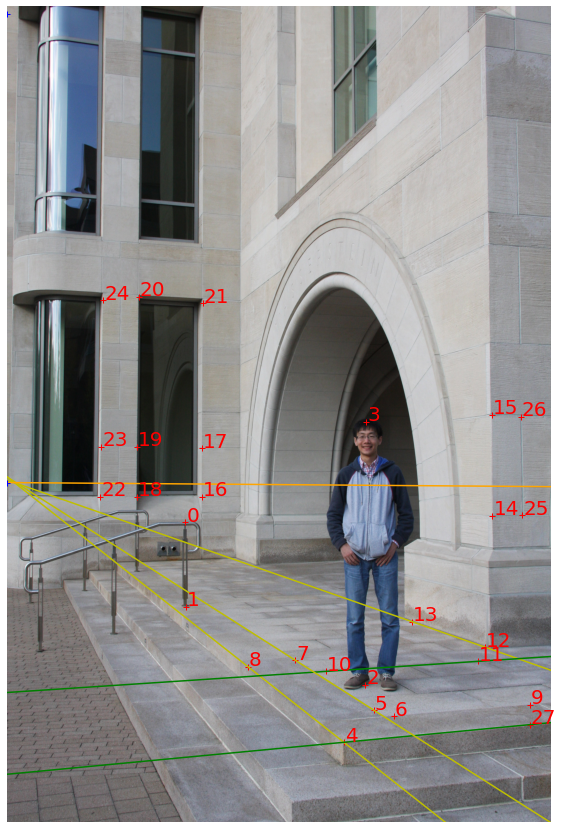

In [34]:
# helper: plot line in given axes
def plotimageline(ax,h,w,l,col):
    #  ax: axes object
    #  h,w: height and width of image
    #  l: line as homogeneous three-vector
    #  col: color string to be passed to ax.plot(), e.g. 'r'
    
    assert l.size==3,'unexpected line shape'
    assert l[1]!=0,'exactly-vertical lines are not supported'

    # intersections of line with image boundary
    x_ext = np.array([0, w - 1])
    y_ext = -(l[0] * x_ext + l[2]) / l[1]
    
    # draw
    ax.plot(x_ext, y_ext,col)
    return 1

# load image
assert os.path.exists('./xiong.jpg'), 'Upload xiong.jpg and then re-run cell'
img = cv2.imread('./xiong.jpg')

# load point coordinates
assert os.path.exists('./xiongpts.pickle'), 'Upload xiongpts.pickle and then re-run cell'
pts=pickle.load(open('./xiongpts.pickle', 'rb'))
x=pts['x']
y=pts['y']

# image dimensions
h, w = img.shape[:2]

# for convenience, homogenize all points (dtype float)
# X is an Nx3 array, with each row the homogeneous coords of an image point
X=np.concatenate((x[:,np.newaxis],y[:,np.newaxis],np.ones((x.size,1))), axis=1)

# display image with data points
plt.rcParams['figure.figsize'] = [10, 15]
fig, ax = plt.subplots()
plt.xlim([0, img.shape[1] - 1])
plt.ylim([img.shape[0] - 1, 0])
ax.imshow(img[:, :, ::-1])
ax.axis('off')
ax.plot(x, y, 'r+')
for i,txt in enumerate(np.arange(x.size)):
    ax.annotate(txt,(x[i]+5, y[i]-5),color='red',size=20)
    
####### WORK HERE ########
# To get you started, we've provided an example of how to calculate the
# coordinates of a line that is the join of two points, and how to 
# plot that line in the image.

# coordinates of line joining two points is the cross-product
#   of the homogeneous point coordinates
l=np.cross(X[4,:],X[8,:])
l2 = np.cross(X[12,:], X[13,:])

plane = np.cross(l,l2)
print(plane / plane[2])


l3 = np.cross(X[10,:], X[11,:])
l4 = np.cross(X[4,:],X[27,:])

plane2 = np.cross(l3,l4)
print(plane2 / plane2[2])


l5 = np.cross(X[5,:], X[7,:])


# print(X[23,:])

# use helper function to plot line in image
plotimageline(ax,h,w,l,'y')
plotimageline(ax,h,w,l2,'y')
plotimageline(ax,h,w,l3,'g')
plotimageline(ax,h,w,l4,'g')
plotimageline(ax,h,w,l5,'y')

van = np.cross(plane, plane2) / np.cross(plane, plane2)[2]

# plotimageline(ax,h,w,)

plotimageline(ax,h,w,van,'orange')
# plotimageline(ax,h,w,plane2/plane2[2],'y')

ax.plot((plane/plane[2])[:2], 'b+')

## VANISHING LINE: MARKED IN Orange
## VANISHING POINT That is visible on the image: marked with blue cross (on the left border of the image)